# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [3]:
def apply_svd_custom(X_train, X_test, n_components):
    # Perform SVD on the training data
    U, S, Vt = np.linalg.svd(X_train, full_matrices=False)

    # Select the top n_components singular values and vectors
    S = np.diag(S[:n_components])
    U = U[:, :n_components]
    Vt = Vt[:n_components, :]

    # Reduce the dimensions of both the train and test sets
    X_train_reduced = np.dot(U, S)
    X_test_reduced = np.dot(X_test, Vt.T[:, :n_components])

    return X_train_reduced, X_test_reduced


## Part 3: Train Logistic Regression and Measure Performance

In [4]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [5]:
svd_components = [10, 100, 200, 500, 784]

# Store the results
results = []
accuracies = []
training_times = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")

    X_train_reduced, X_test_reduced = apply_svd_custom(X_train, X_test, n_components)
    # Apply SVD to the training and test sets


    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_reduced, y_train, X_test_reduced, y_test)

    accuracies.append(accuracy)
    training_times.append(training_time)


    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")


Training models with different levels of SVD preprocessing...
Applying custom SVD with 10 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 10, Accuracy: 0.8020, Training time: 1.1732 seconds
Applying custom SVD with 100 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 100, Accuracy: 0.9181, Training time: 58.1118 seconds
Applying custom SVD with 200 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 200, Accuracy: 0.9206, Training time: 150.4895 seconds
Applying custom SVD with 500 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 500, Accuracy: 0.9205, Training time: 524.3063 seconds
Applying custom SVD with 784 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 784, Accuracy: 0.9209, Training time: 868.4607 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


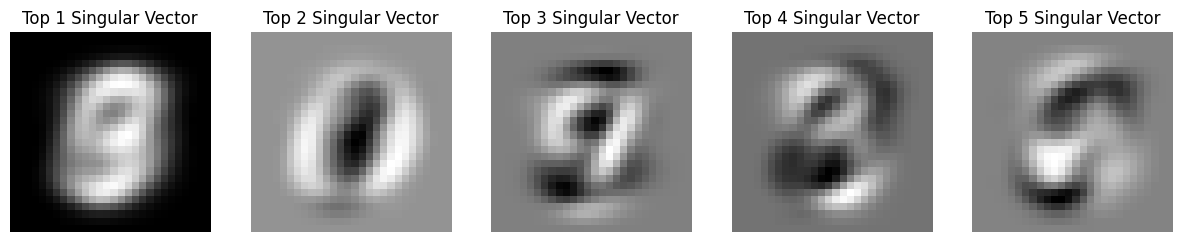

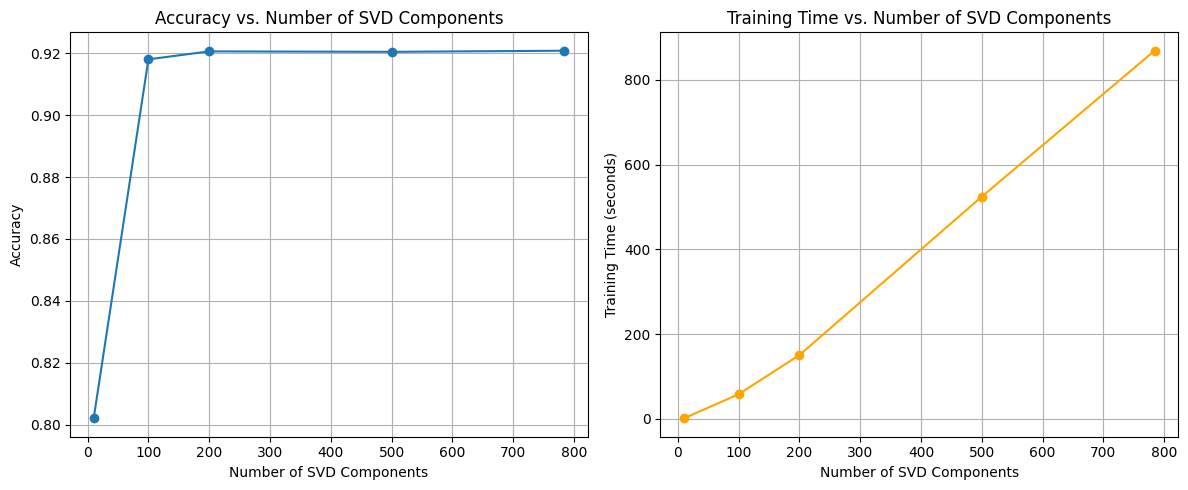

In [8]:
# Visualizing the Top 5 Singular Vectors
U, S, Vt = np.linalg.svd(X_train, full_matrices=False)
top_5_singular_vectors = Vt[:5, :]

plt.figure(figsize=(15, 10))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(top_5_singular_vectors[i].reshape(28, 28), cmap='gray')
    plt.title(f"Top {i+1} Singular Vector")
    plt.axis('off')
plt.show()
plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1)
plt.plot(svd_components, accuracies, marker='o')
plt.title('Accuracy vs. Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')
plt.grid(True)

# Plot training time
plt.subplot(1, 2, 2)
plt.plot(svd_components, training_times, marker='o', color='orange')
plt.title('Training Time vs. Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (seconds)')
plt.grid(True)

plt.tight_layout()
plt.show()

## Part 6: Analyze / Conclusion
The top 5 singular vectors contain important information about the general feature of the digits and they are important for efficiently representing the data. We can see that the accuracy drastically increased from 0.80 to 0.92 when SVD components increased from 10 to 100. After 200 components, the accuracy plateaued, meanining that most of the important information necessary for accurate classification is captured within 100 to 200 components. This means that accuracy benefits from increasing the SVD components, but the effect diminishes after reaching a certain number in which adding more components will not significantly improve the performance.
We can also see in the plot that training time increases linearly with the number of svd components, which means that more components and data for the model results in longer training times. This tells us about a trade off between speed and model complexity. While higher SVD components may not improve acccuracy much beyond a certain point, they still exponentially increase the computational cost. This reveals the importance of choosing an appropriate number of components to balance performance and computation time.
